# Notebook Exploratoire

Projet 5 Machine Learning engineer

In [1]:
#Import les libriries 

import re
import nltk
import time
import string

import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import manifold
from bs4 import BeautifulSoup
from scipy.sparse import hstack

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from nltk.stem.porter import PorterStemmer   

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer



# import module nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bleye\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bleye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bleye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bleye\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# Création d'un df origine 
df_origine = pd.read_csv("QueryResults.csv")

In [3]:
# creation d'une copie du df origine afin de garder une copie du df original en cas de besoin
df = df_origine.copy()

In [4]:
df.head(5)

,Title,Body,Tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...
1,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>
2,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><datetime>
3,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...
4,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...


In [5]:
# Vérification des valeirs manquantes
df.isnull().sum()

Title      0
Body       0
Tags     109
dtype: int64

Notre df comporte 3 colonnes, Title, Body, et Tags. Nous pouvons voir que la colonnes tags comporte 109 valeurs manquantes

In [6]:
def recupTag(df):

    # Créer une liste pour stocker les premiers tags
    """ Cette fonction sert a récupérer le premier tags de la ligne, car certains tags ne sont presents que très peu de fois. 
    Puis de mettre ces tags triés dans une nouvelle colonne nommer "new_tags"
    """ #help(recupTag)
    
    list_ = []
    for tags in df['Tags']:
        try:
            # Séparer les tags et garder le premier, retirer les caractères '<' et '>'
            first_tag = tags.split('><')[0].replace('<', '').replace('>', '')
            list_.append(first_tag)
        except:
            # si 'tags' = 'NaN', ajouter 'vide'
            list_.append('vide')

    # Ajoute les premiers tags dans une nouvelle colonne du DataFrame
    df['new_tags'] = list_
    return df

In [7]:
# Application de la fonction recuptags
df = recupTag(df)

In [8]:
# vérification
df.head(5)

,Title,Body,Tags,new_tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...,c#
1,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,html
2,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><datetime>,c#
3,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,c#
4,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,html


la nouvelle colonne "new_tags" à bien été creer

In [9]:
df.sample(5)

,Title,Body,Tags,new_tags
44640,How do I create a new row in WPF DataGrid when...,<p>I have a project with an XmlDataProvider bo...,<c#><wpf><wpftoolkit><xmldataprovider>,c#
42803,"""new BigDecimal(13.3D)"" results in imprecise ""...",<p>How is it that Java's <code>BigDecimal</cod...,<java><precision><bigdecimal>,java
10439,What is the best SQL library for use in Common...,<p>Ideally something that will work with Oracl...,<sql><database><postgresql><lisp><common-lisp>,sql
27037,Using Web.SiteMap with Dynamic URLS (URL Routing),<p>I would like to match &quot;approximate&quo...,<mapping><url-routing><sitemap><wildcard><site...,mapping
14839,User32 API calls in .NET,<p>I'm currently planning out a project involv...,<managed><user32>,managed


In [10]:
df.tail(5)

,Title,Body,Tags,new_tags
46492,Flash loads twice workaround?,<p>While investigating a reported problem with...,<flash><swfobject>,flash
46493,How do you create python methods(signature and...,<p>I've created a method that generates a new ...,<python><django><dynamic><methods><lambda>,python
46494,ETag vs Header Expires,<p>I've looked around but haven't been able to...,<http><caching><etag><expires-header>,http
46495,How do I determine the longest similar portion...,"<p>As per the title, I'm trying to find a way ...",<perl><algorithm><string><similarity>,perl
46496,How do you validate a binary search tree?,<p>I read on here of an exercise in interviews...,<algorithm><data-structures><binary-search-tree>,algorithm


In [11]:
# supprime les lignes qui contiennent le mot 'vide' dans la colonne 'new_tags'
df= df[df["new_tags"]!= 'vide']

In [12]:
# Vérification qu'il n'y a plus de valeurs manquantes
df.isnull().sum()

Title       0
Body        0
Tags        0
new_tags    0
dtype: int64

mon df ne contient plus aucunes données manquantes

# Information dataset

In [13]:
# nombre de lignes et de colonnes
df.shape

(46388, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46388 entries, 0 to 46496
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     46388 non-null  object
 1   Body      46388 non-null  object
 2   Tags      46388 non-null  object
 3   new_tags  46388 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [15]:
df.dtypes

Title       object
Body        object
Tags        object
new_tags    object
dtype: object

In [16]:
# Nombre de tags uniques
len(df['new_tags'].unique())

1442

mon df contient 1442 tags differents

# DataCleaning

Le datacleaning en nlp comprends :

    - Recuperer le code entre les balises html
    - Mettre le texte en minuscule
    - Supprimer les liens https
    - Supprimer les ponctuations
    - Supprimer les chiffres (sauf si les chiffres ont un intérêt)
    - Tokenisation (garder la racine des mots)
    - Supprimer les stop word 

In [17]:
def preprocess_text(text):
    # Récupère le text entre les balises html
    text = BeautifulSoup(text).get_text()
    # Converti en minuscules
    text = text.lower()
    # Supprime les liens
    text = re.sub(r'https?\S+', ' ', text)
    # Supprime les ponctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Supprime les chiffres
    text = re.sub(r'\d+', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Supprime les stopwords engish
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def preprocess_dataset(dataset, text_columns):
    for col in text_columns:
        dataset[col] = dataset[col].apply(preprocess_text)
    return dataset

def apply_stemming_lemmatization(tokens):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed = [ps.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in stemmed]
    return lemmatized

def preprocess_and_transform(dataset):
    # Appliquer le prétraitement
    text_columns = ['Title', 'Body', 'new_tags']
    dataset = preprocess_dataset(dataset, text_columns)
    # Appliquer le stemming et lemmatization
    for col in text_columns:
        dataset[col] = dataset[col].apply(apply_stemming_lemmatization)
    return dataset

In [20]:
df.head(5)

,Title,Body,Tags,new_tags
0,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,<c#><floating-point><type-conversion><double><...,c#
1,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,<html><css><internet-explorer-7>,html
2,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,<c#><datetime>,c#
3,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,<c#><datetime><time><datediff><relative-time-s...,c#
4,Determine a user's timezone,<p>Is there a standard way for a web server to...,<html><browser><timezone><user-agent><timezone...,html


In [21]:
print("Avant nettoyage:")
print(df.iloc[0, 1]) # row_index, column_index

Avant nettoyage:
<p>I want to assign the decimal variable &quot;trans&quot; to the double variable &quot;this.Opacity&quot;.</p>
<pre class="lang-cs prettyprint-override"><code>decimal trans = trackBar1.Value / 5000;
this.Opacity = trans;
</code></pre>
<p>When I build the app it gives the following error:</p>
<blockquote>
<p>Cannot implicitly convert type decimal to double</p>
</blockquote>



In [22]:
# Application de la fonction, mets environs 3min
preprocessed_df = preprocess_and_transform(df)
preprocessed_df.head(5)

C:\Users\bleye\AppData\Local\Temp\ipykernel_11508\2761218599.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text).get_text()


,Title,Body,Tags,new_tags
0,"[convert, decim, doubl, c]","[want, assign, decim, variabl, tran, doubl, va...",<c#><floating-point><type-conversion><double><...,[c]
1,"[width, collaps, percentag, width, child, elem...","[absolut, posit, div, contain, sever, child, o...",<html><css><internet-explorer-7>,[html]
2,"[calcul, someon, age, base, datetim, type, bir...","[given, datetim, repres, person, birthday, cal...",<c#><datetime>,[c]
3,"[calcul, rel, time, c]","[given, specif, datetim, valu, display, rel, t...",<c#><datetime><time><datediff><relative-time-s...,[c]
4,"[determin, user, timezon]","[standard, way, web, server, abl, determin, us...",<html><browser><timezone><user-agent><timezone...,[html]


In [23]:
print("Après nettoyage:")
print(preprocessed_df.iloc[0, 1])

Après nettoyage:
['want', 'assign', 'decim', 'variabl', 'tran', 'doubl', 'variabl', 'thisopac', 'decim', 'tran', 'trackbarvalu', 'thisopac', 'tran', 'build', 'app', 'give', 'follow', 'error', 'implicitli', 'convert', 'type', 'decim', 'doubl']


In [24]:
# sélection des 3 colonnes a utiliser pour la suite
df_final = preprocessed_df[["Title", "Body", "new_tags"]]

In [25]:
# Verification du df final
df_final.head(5)

,Title,Body,new_tags
0,"[convert, decim, doubl, c]","[want, assign, decim, variabl, tran, doubl, va...",[c]
1,"[width, collaps, percentag, width, child, elem...","[absolut, posit, div, contain, sever, child, o...",[html]
2,"[calcul, someon, age, base, datetim, type, bir...","[given, datetim, repres, person, birthday, cal...",[c]
3,"[calcul, rel, time, c]","[given, specif, datetim, valu, display, rel, t...",[c]
4,"[determin, user, timezon]","[standard, way, web, server, abl, determin, us...",[html]


# Analyse univarié

### Analyse des mots les plus frequents pour la colonne "Title"

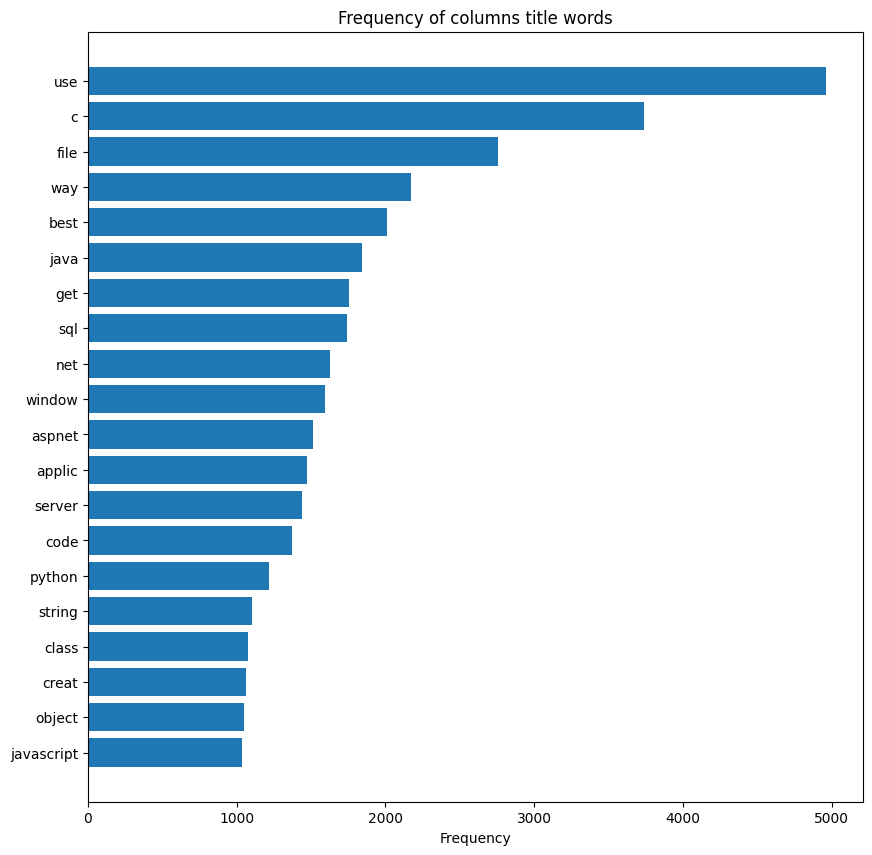

In [26]:
# calcul de la frequence de mot par colonne
def get_word_frequencies(column_data):
    all_words = [word for tokens in column_data for word in tokens]
    word_freq = Counter(all_words)
    return word_freq

# Calcul de la fréquence des mots pour la colonne 'Title'
title_word_freq = get_word_frequencies(df_final['Title'])

# 20 mots les plus fréquents
most_common_words = title_word_freq.most_common(20)
words, counts = zip(*most_common_words)

# Visualiser les fréquences des mots les plus courants
plt.figure(figsize=(10, 10))
plt.barh(range(len(words)), counts, align='center')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Frequency of columns title words')
plt.gca().invert_yaxis()  # invert_yaxis sert à avoir le mot le plus fréquent en haut
plt.show()

Au vue du graph les 5 mots les plus fréquent sur la colonne "Title" sont "use, c, file, way, best"

### Pour la colonne "Body"

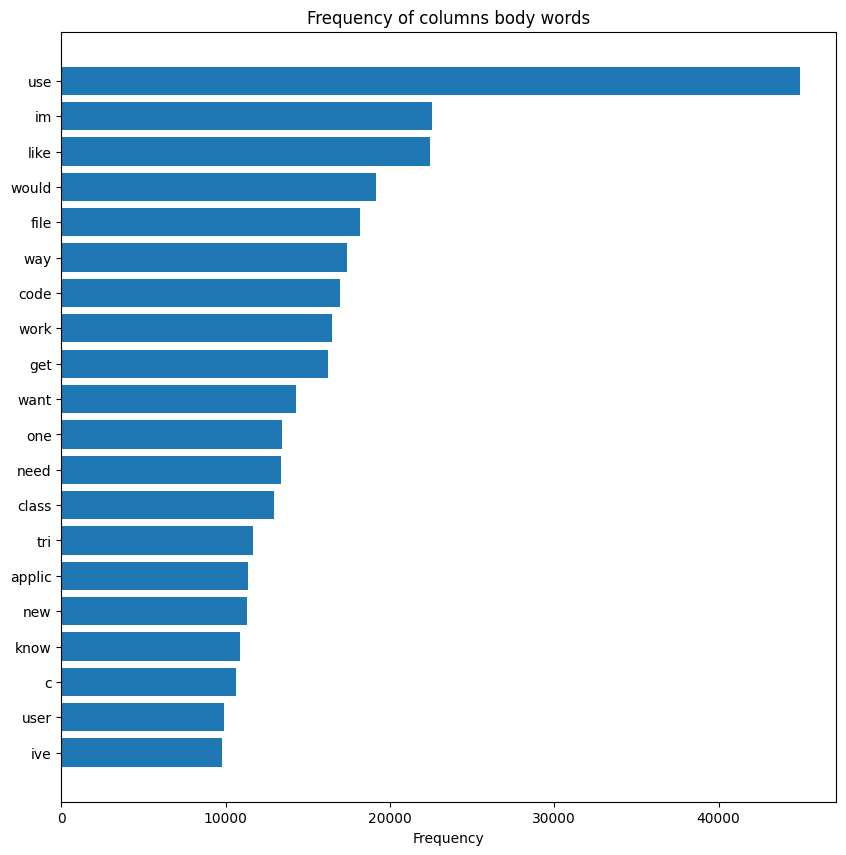

In [27]:

# calcul de la frequence des mots par colonne
def get_word_frequencies(column_data):
    all_words = [word for tokens in column_data for word in tokens]
    word_freq = Counter(all_words)
    return word_freq

# Calcul de la fréquence des mots pour la colonne 'Title'
title_word_freq = get_word_frequencies(df_final['Body'])

# 20 mots les plus fréquents
most_common_words = title_word_freq.most_common(20)
words, counts = zip(*most_common_words)

# Visualiser les fréquences des mots les plus courants
plt.figure(figsize=(10, 10))
plt.barh(range(len(words)), counts, align='center')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Frequency of columns body words')
plt.gca().invert_yaxis()
plt.show()

Au vue du graph les mots les plus frequent pour la colonne "Body" sont "use, im, like, would, file"

### Pour la colonne "new_tags"

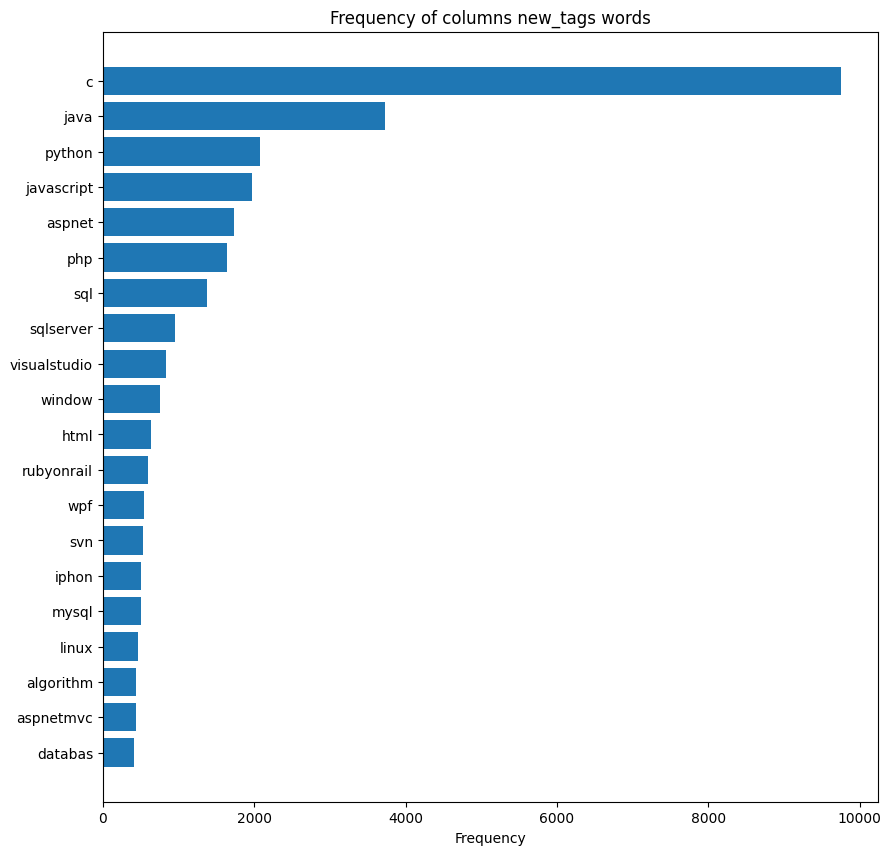

In [28]:

# calcul de la frequence des mot par colonne
def get_word_frequencies(column_data):
    all_words = [word for tokens in column_data for word in tokens]
    word_freq = Counter(all_words)
    return word_freq

# Calcul de la fréquence des mots pour la colonne 'new_tags'
title_word_freq = get_word_frequencies(df_final['new_tags'])

# 20 mots les plus fréquents
most_common_words = title_word_freq.most_common(20)
words, counts = zip(*most_common_words)

# Visualiser les fréquences des mots les plus courants
plt.figure(figsize=(10, 10))
plt.barh(range(len(words)), counts, align='center')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Frequency of columns new_tags words')
plt.gca().invert_yaxis()  
plt.show()

Au vue du graph les 5 tags les plus utiliser pour la colonne "new_tags" sont "c, java, python, javascript, aspnet"

### Analyse des mots les plus frequents par nuage de mot par colonne

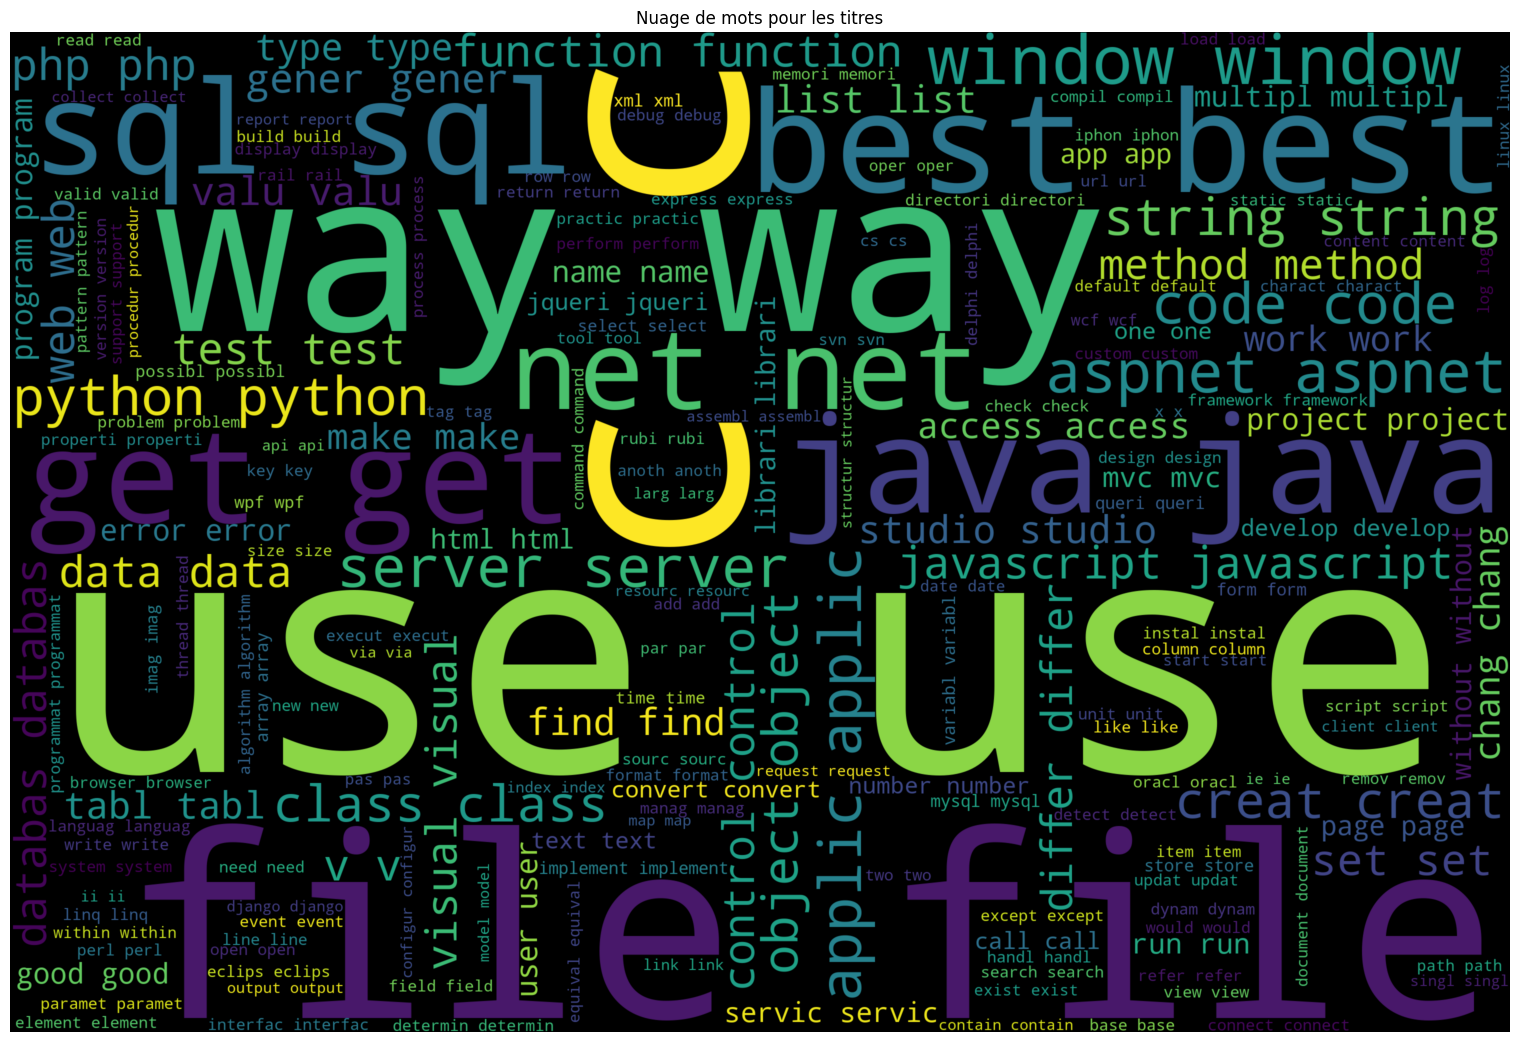

In [29]:
# création de nuage de mots pour la colonne title
title_word_freq = get_word_frequencies(preprocessed_df['Title'])

# Convertir les fréquences de mots en une seule chaîne de texte
text = ' '.join([word for word, freq in title_word_freq.items() for _ in range(freq)])

# Créer et afficher le nuage de mots
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    stopwords=set(stopwords.words('english'))
).generate(text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Nuage de mots pour les titres')
plt.show()

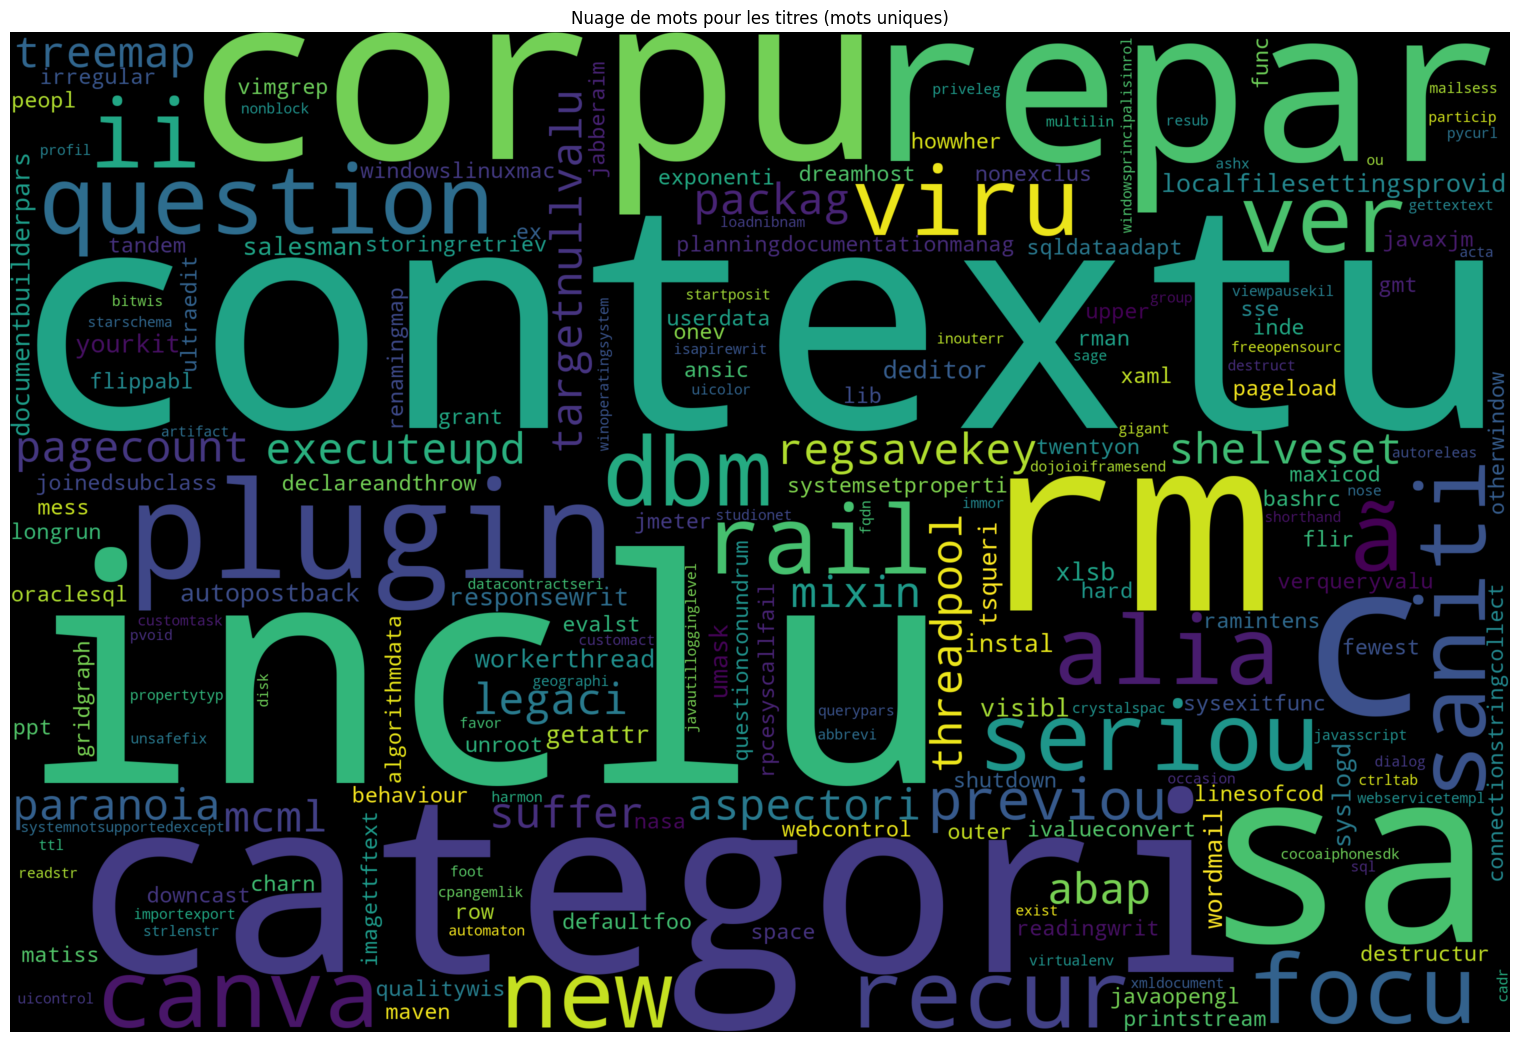

In [30]:
# création de nuage de mots pour la colonne Title
titles = preprocessed_df['Title']

# Liste de mots uniques
unique_words = set()
stop_words = set(stopwords.words('english'))
for title in titles:
    unique_words.update(word.lower() for word in title if word.lower() not in stop_words)

# chaîne de texte à partir des mots uniques
unique_words_text = ' '.join(unique_words)

# nuage de mots
wordcloud = WordCloud(
   width=3000,
   height=2000,
   background_color='black'
).generate(unique_words_text)

# Affiche le nuage de mots
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Nuage de mots pour les titres (mots uniques)')
plt.show()
 

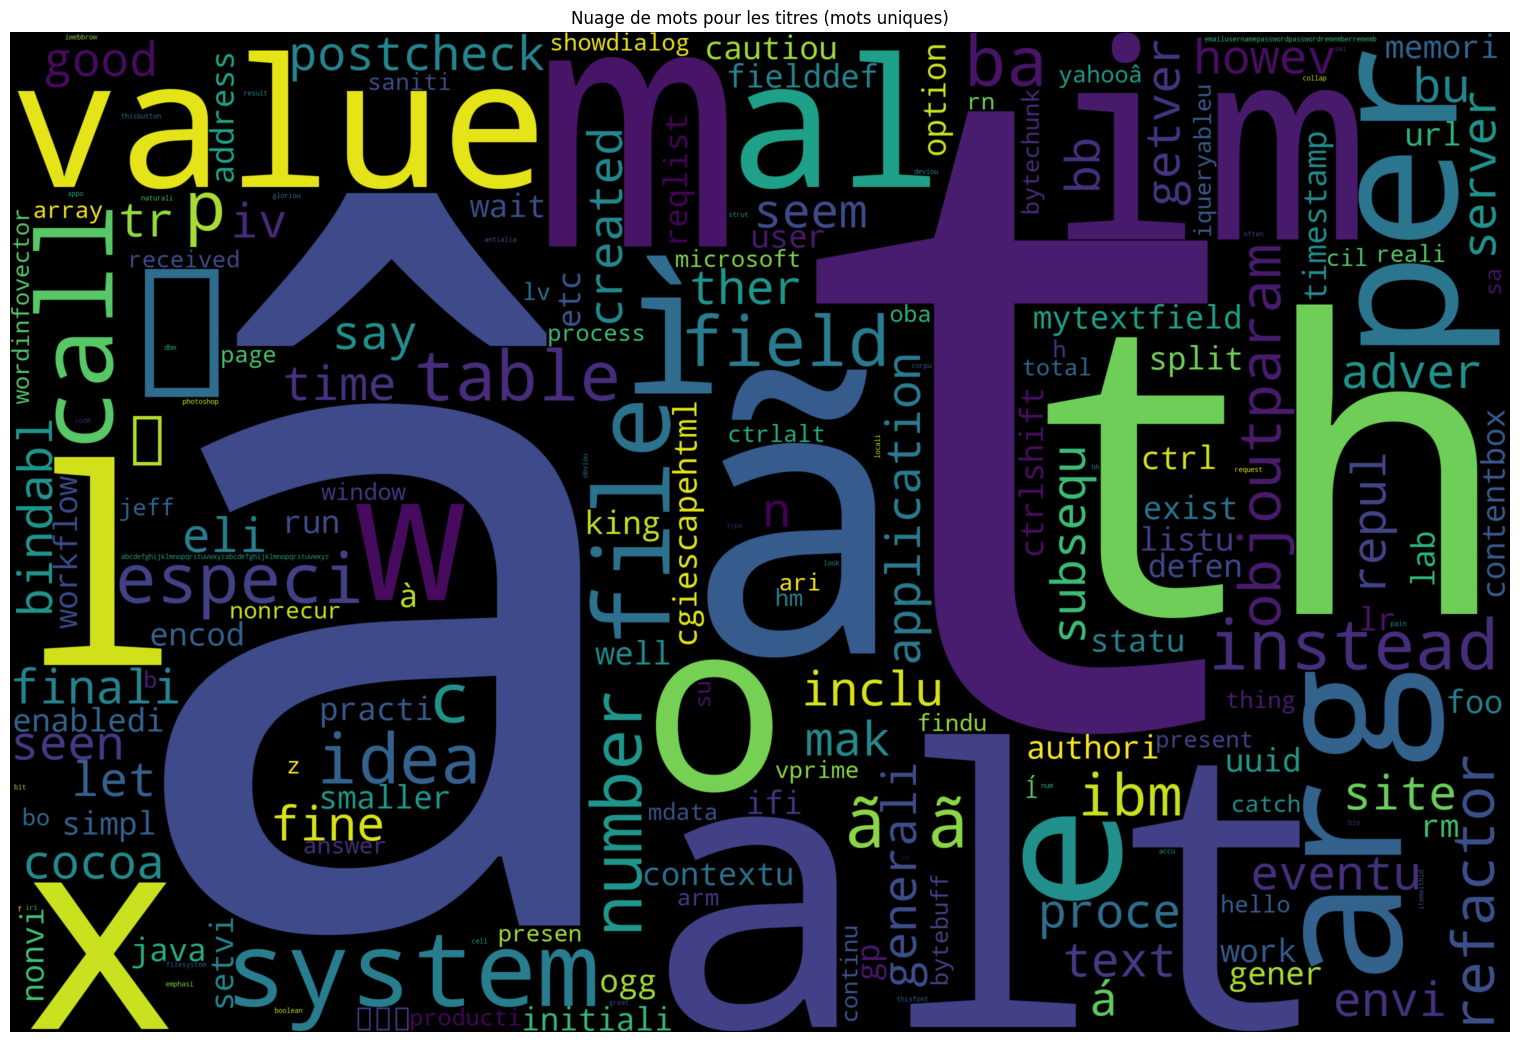

In [31]:
# création de nuage de mots pour la colonne Body
bodys = preprocessed_df['Body']

# Liste de mots uniques
unique_words = set()
stop_words = set(stopwords.words('english'))
for body in bodys:
    unique_words.update(word.lower() for word in body if word.lower() not in stop_words)

# chaîne de texte à partir des mots uniques
unique_words_text = ' '.join(unique_words)

# nuage de mots
wordcloud = WordCloud(
   width=3000,
   height=2000,
   background_color='black'
).generate(unique_words_text)

# Affiche le nuage de mots
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Nuage de mots pour les titres (mots uniques)')
plt.show()

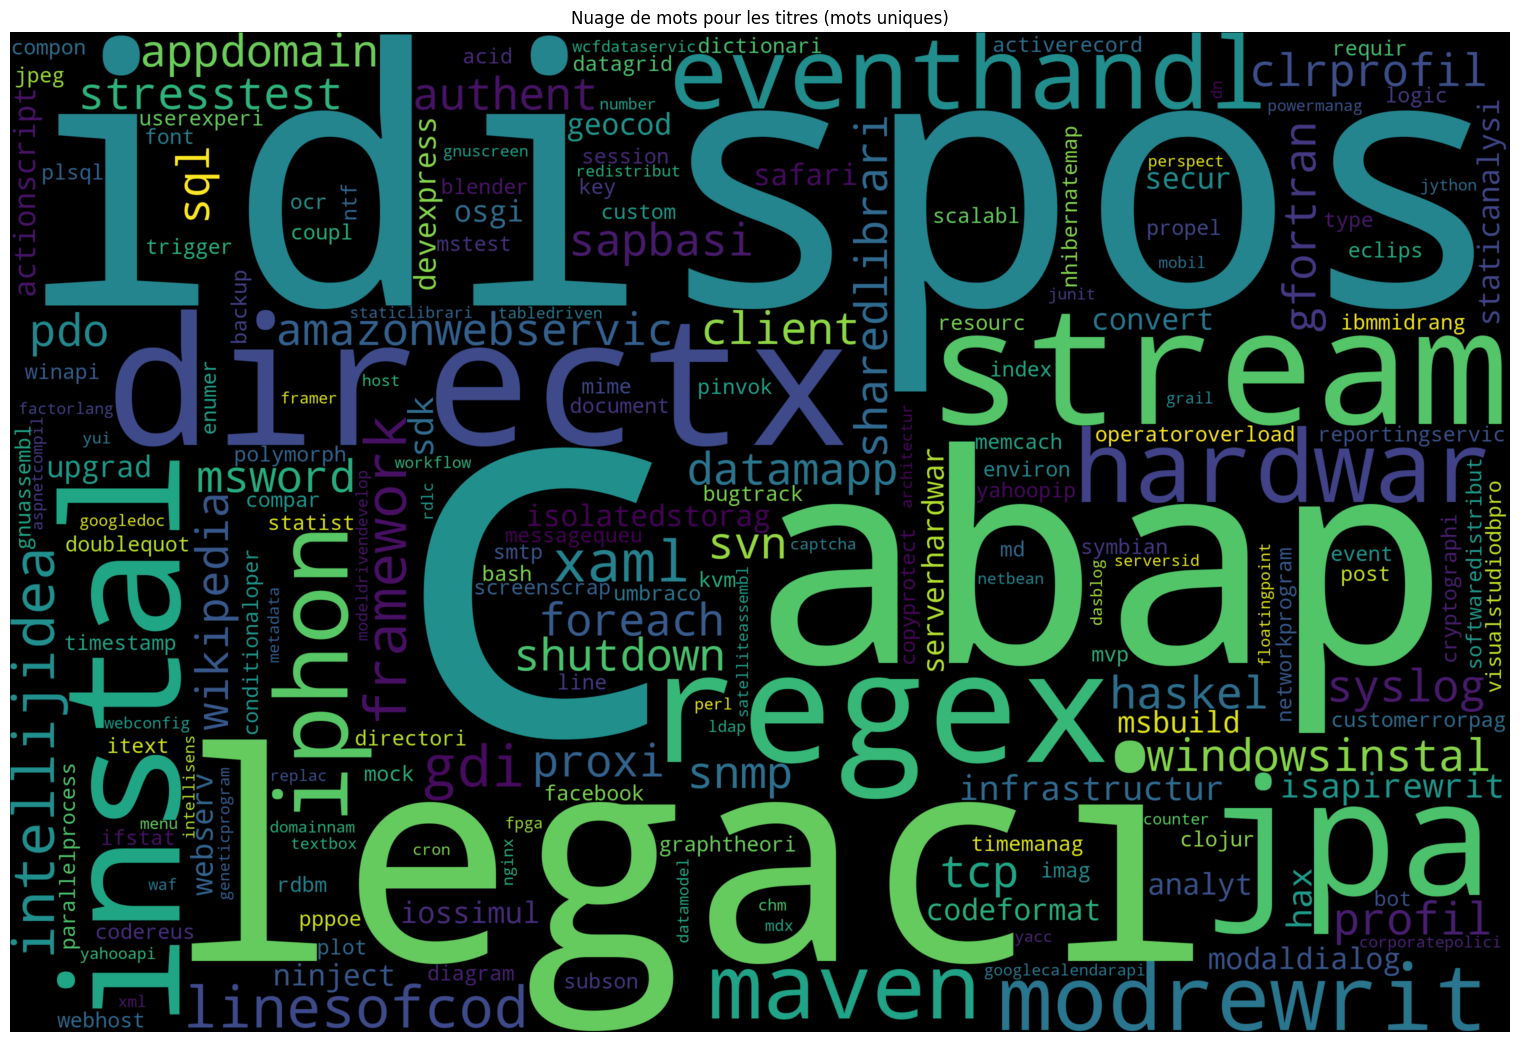

In [32]:
# création de nuage de mots pour la colonne new_tags

tags = preprocessed_df['new_tags']

# Liste de mots uniques
unique_words = set()
stop_words = set(stopwords.words('english'))
for tag in tags:
    unique_words.update(word.lower() for word in tag if word.lower() not in stop_words)

# une chaîne de texte à partir des mots uniques
unique_words_text = ' '.join(unique_words)

# nuage de mots
wordcloud = WordCloud(
   width=3000,
   height=2000,
   background_color='black'
).generate(unique_words_text)

# Affiche le nuage de mots
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Nuage de mots pour les titres (mots uniques)')
plt.show()

# Analyse Multivarié

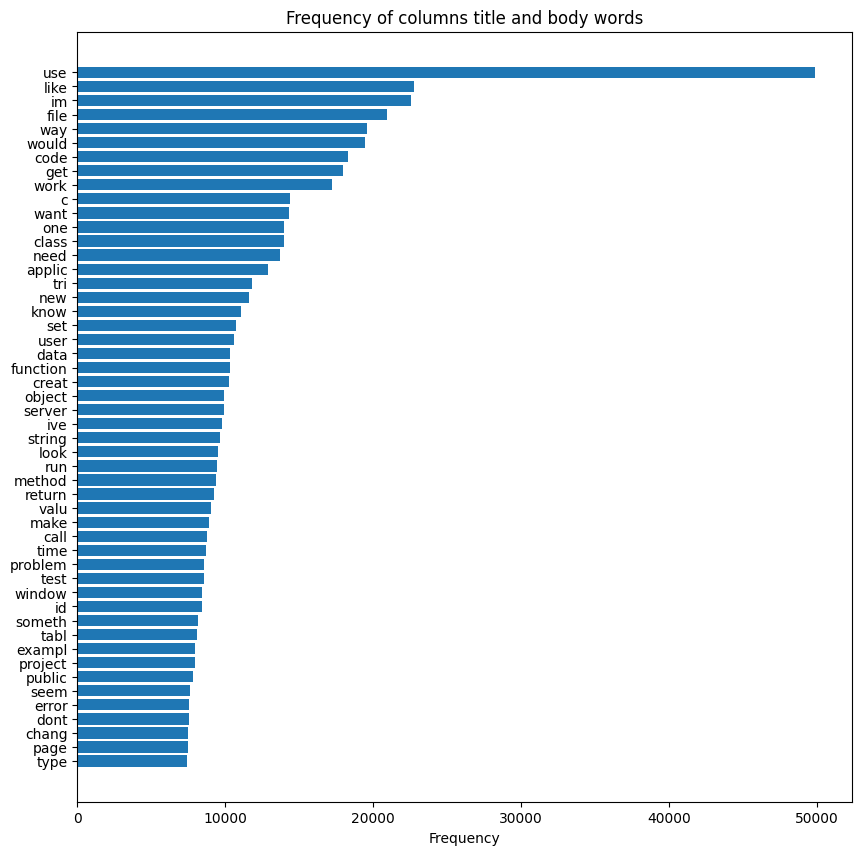

In [33]:
# Calcule les fréquences des mots pour les colonnes Title et body
def get_word_frequencies(column_data):
    all_words = [word for tokens in column_data for word in tokens]
    word_freq = Counter(all_words)
    return word_freq

title_word_freq = get_word_frequencies(df_final['Title'])
body_word_freq = get_word_frequencies(df_final['Body'])

# Combine les mots des deux colonnes
combined_word_freq = title_word_freq + body_word_freq

# 50 mots les plus fréquents
most_common_words = combined_word_freq.most_common(50)
words, counts = zip(*most_common_words)

# Visualiser les fréquences des mots les plus courants
plt.figure(figsize=(10, 10))
plt.barh(range(len(words)), counts, align='center')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Frequency of columns title and body words')
plt.gca().invert_yaxis() 
plt.show()

In [34]:
# Garder uniquement les 15 tags les plus fréquents
top_15_tags = df_final['new_tags'].explode().value_counts().head(15).index.tolist()

# df_filtered garde uniquement les lignes avec les 15 tags les plus frequents
df_filtered = df_final[df_final['new_tags'].apply(lambda tags: any(tag in top_15_tags for tag in tags))] 

In [35]:
# verification du df_filtered
df_filtered.head(5)

,Title,Body,new_tags
0,"[convert, decim, doubl, c]","[want, assign, decim, variabl, tran, doubl, va...",[c]
1,"[width, collaps, percentag, width, child, elem...","[absolut, posit, div, contain, sever, child, o...",[html]
2,"[calcul, someon, age, base, datetim, type, bir...","[given, datetim, repres, person, birthday, cal...",[c]
3,"[calcul, rel, time, c]","[given, specif, datetim, valu, display, rel, t...",[c]
4,"[determin, user, timezon]","[standard, way, web, server, abl, determin, us...",[html]


In [36]:
# Transformer les listes de tokens en chaînes de caractères
df_filtered.loc[:,'Title'] = df_filtered['Title'].apply(lambda tokens: ' '.join(tokens))
df_filtered.loc[:,'Body'] = df_filtered['Body'].apply(lambda tokens: ' '.join(tokens))
df_filtered.loc[:,'new_tags'] = df_filtered['new_tags'].apply(lambda tokens: ' '.join(tokens))

In [37]:
df_filtered.head(5)

,Title,Body,new_tags
0,convert decim doubl c,want assign decim variabl tran doubl variabl t...,c
1,width collaps percentag width child element ab...,absolut posit div contain sever child one rel ...,html
2,calcul someon age base datetim type birthday,given datetim repres person birthday calcul ag...,c
3,calcul rel time c,given specif datetim valu display rel time lik...,c
4,determin user timezon,standard way web server abl determin user time...,html


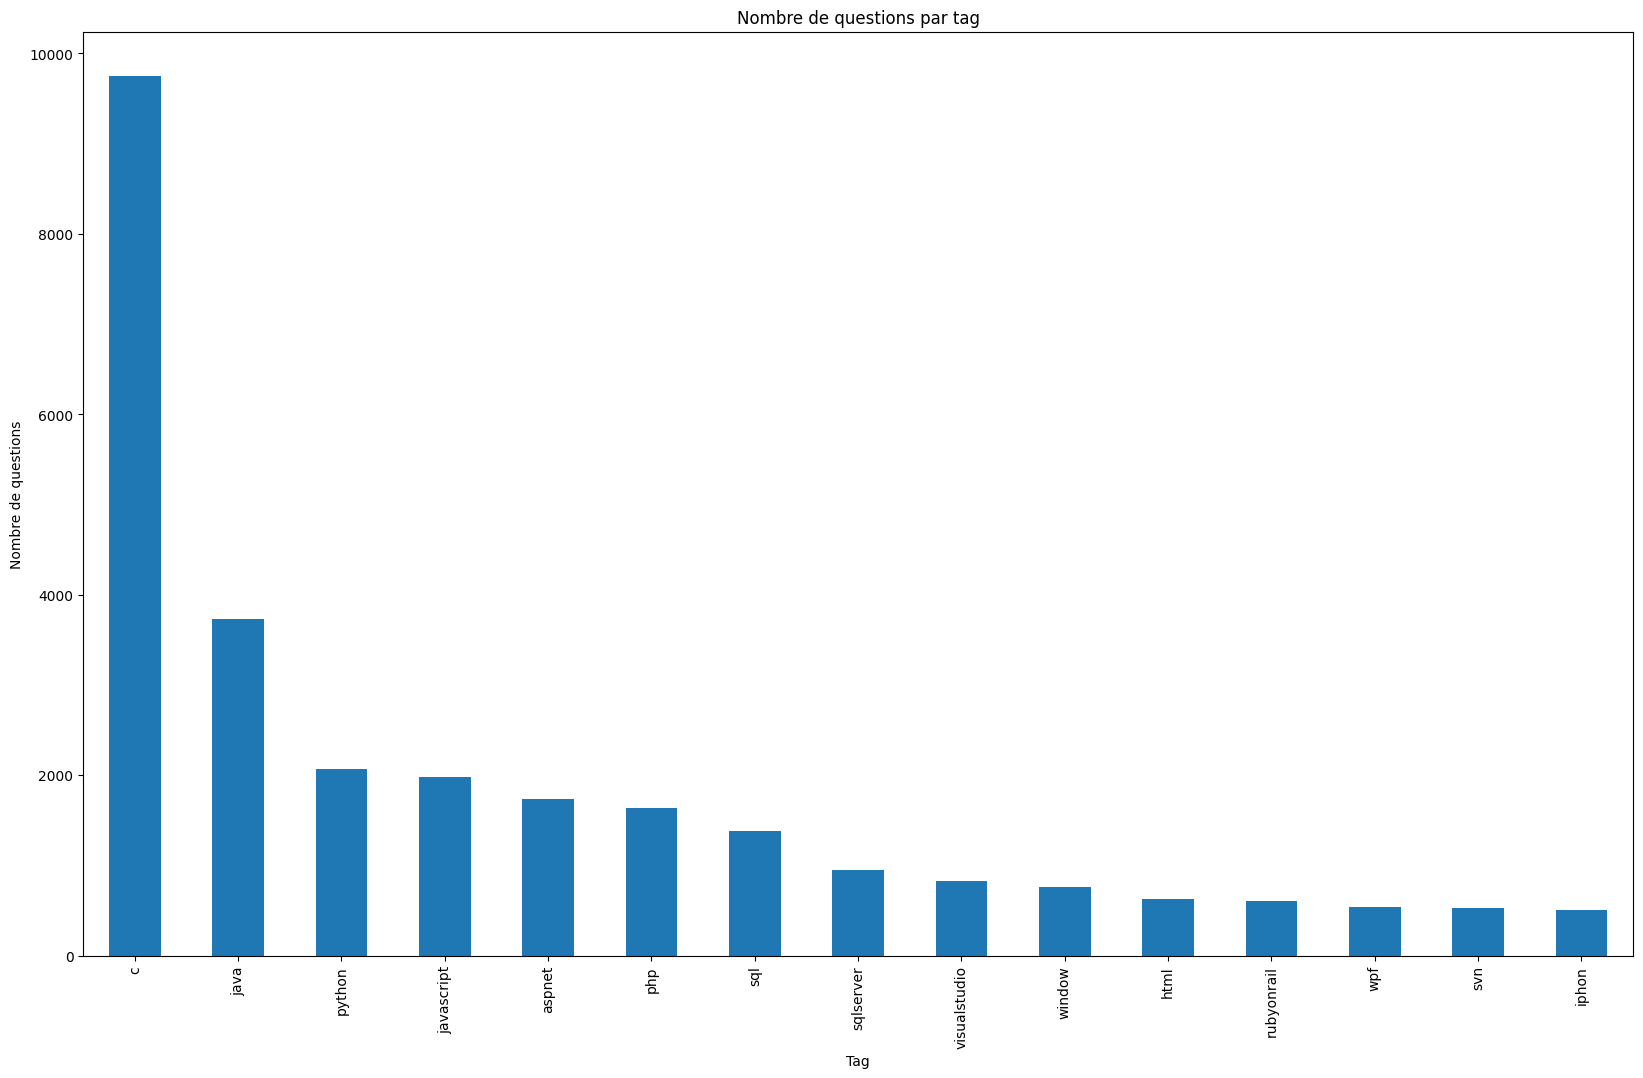

In [38]:
# Compter le nombre de questions par tag
tag_counts = df_filtered['new_tags'].value_counts()

# Créer un graphique en barres
plt.figure(figsize=(20, 12))
tag_counts.plot(kind='bar')
plt.title('Nombre de questions par tag')
plt.xlabel('Tag')
plt.ylabel('Nombre de questions')
plt.show()